In [1]:
from DataDownCode.GetChartData import *
from DataProcessing.DataCheck import *
from DataProcessing.chartProcessing import *

In [2]:
candleMin = 10
marketCode = 'KRW-G'
stTime = 'starting'
edTime = 'present'

Chart_Data = get_chart(candleMin, marketCode, stTime, edTime)

In [3]:
check_sort = check_decreas_sort(Chart_Data)
Chart_Data = check_last_time(Chart_Data, stTime)
invalid_rows = check_timedelta(Chart_Data, candleMin)

c:\Users\sailo\OneDrive\문서\가상화폐 차트 데이터 분석\chart analysis code\DataProcessing\DataCheck.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalid_rows.drop(invalid_rows.index[-1], axis=0, inplace=True)


In [4]:
print(check_sort)
print(invalid_rows)

True
                    time       timedelta
212  2024-09-21 06:10:00 0 days 00:20:00
221  2024-09-21 04:30:00 0 days 00:20:00
937  2024-09-16 05:00:00 0 days 00:20:00
1371 2024-09-13 04:30:00 0 days 00:20:00
2096 2024-09-08 03:30:00 0 days 00:20:00
2379 2024-09-06 04:10:00 0 days 00:30:00
2384 2024-09-06 03:00:00 0 days 00:20:00
2516 2024-09-05 04:50:00 0 days 00:30:00
2522 2024-09-05 03:30:00 0 days 00:20:00
2656 2024-09-04 05:00:00 0 days 00:20:00
2740 2024-09-03 14:50:00 0 days 00:20:00
2800 2024-09-03 04:40:00 0 days 00:20:00
2801 2024-09-03 04:20:00 0 days 00:30:00
2802 2024-09-03 03:50:00 0 days 00:20:00
2940 2024-09-02 04:40:00 0 days 00:20:00
3224 2024-08-31 05:10:00 0 days 00:20:00
3956 2024-08-26 03:00:00 0 days 00:20:00
9493 2024-07-18 16:00:00 0 days 02:00:00


In [5]:
Chart_Data = Chart_Data.sort_index(ascending=False).reset_index(drop=True)

In [8]:
Chart_Data.iloc[220:230]

,time,open,close,high,low,volumn
220,2024-07-13 00:40:00,55.083333,55.250000,55.483333,54.966667,967725
221,2024-07-13 00:50:00,55.250000,55.250000,55.383333,55.150000,390808
222,2024-07-13 01:00:00,55.216667,54.883333,55.250000,54.883333,495424
223,2024-07-13 01:10:00,54.883333,54.866667,55.016667,54.866667,733723
224,2024-07-13 01:20:00,54.866667,55.050000,55.050000,54.866667,740724
225,2024-07-13 01:30:00,55.066667,55.033333,55.166667,54.916667,1543966
226,2024-07-13 01:40:00,55.083333,55.000000,55.116667,54.900000,1311860
227,2024-07-13 01:50:00,54.966667,55.416667,55.416667,54.883333,421804
228,2024-07-13 02:00:00,55.416667,54.966667,55.416667,54.966667,628554
229,2024-07-13 02:10:00,54.983333,54.966667,55.166667,54.966667,322615


In [7]:
hikin = trans_hikinAshi(Chart_Data)
hikin = create_color_twice(hikin)
chartData = pd.concat([Chart_Data[['open', 'close', 'high', 'low']], hikin['color']], axis=1)

c:\Users\sailo\OneDrive\문서\chart analysis code\DataProcessing\chartProcessing.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart.iloc[0] = [open, close, high, low]
c:\Users\sailo\OneDrive\문서\chart analysis code\DataProcessing\chartProcessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart.iloc[num] = [open, close, high, low]
c:\Users\sailo\OneDrive\문서\chart analysis code\DataProcessing\chartProcessing.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [18]:
chartData.iloc[94:97]

,open,close,high,low,color,group
94,58.666667,58.500000,58.666667,58.166667,red,30
95,58.516667,58.750000,58.866667,58.350000,blue,31
96,58.750000,58.466667,58.850000,58.333333,blue,31


In [8]:
minmax = filter_dataframe(chartData)
delta = create_diff(minmax)

In [20]:
delta.iloc[130:133]

,time,price,time_diff,price_rate
130,399,55.166667,4,-0.5
131,400,55.150000,1,-0.0
132,401,55.133333,1,-0.0


In [31]:
test = delta.copy()

In [32]:
test

,time,price,time_diff,price_rate
0,0,47.166667,0,0.0
1,3,64.916667,3,37.6
2,12,59.300000,9,-8.7
3,14,59.833333,2,0.9
4,15,59.266667,1,-0.9
...,...,...,...,...
861,3149,63.660000,3,1.9
862,3159,62.060000,10,-2.5
863,3161,62.220000,2,0.3
864,3162,62.100000,1,-0.2


In [40]:
test['time_diff'] = test['time_diff'].abs().sort_values(ascending=False)

In [39]:
test['price_rate'] = test['price_rate'].abs().sort_values(ascending=False)

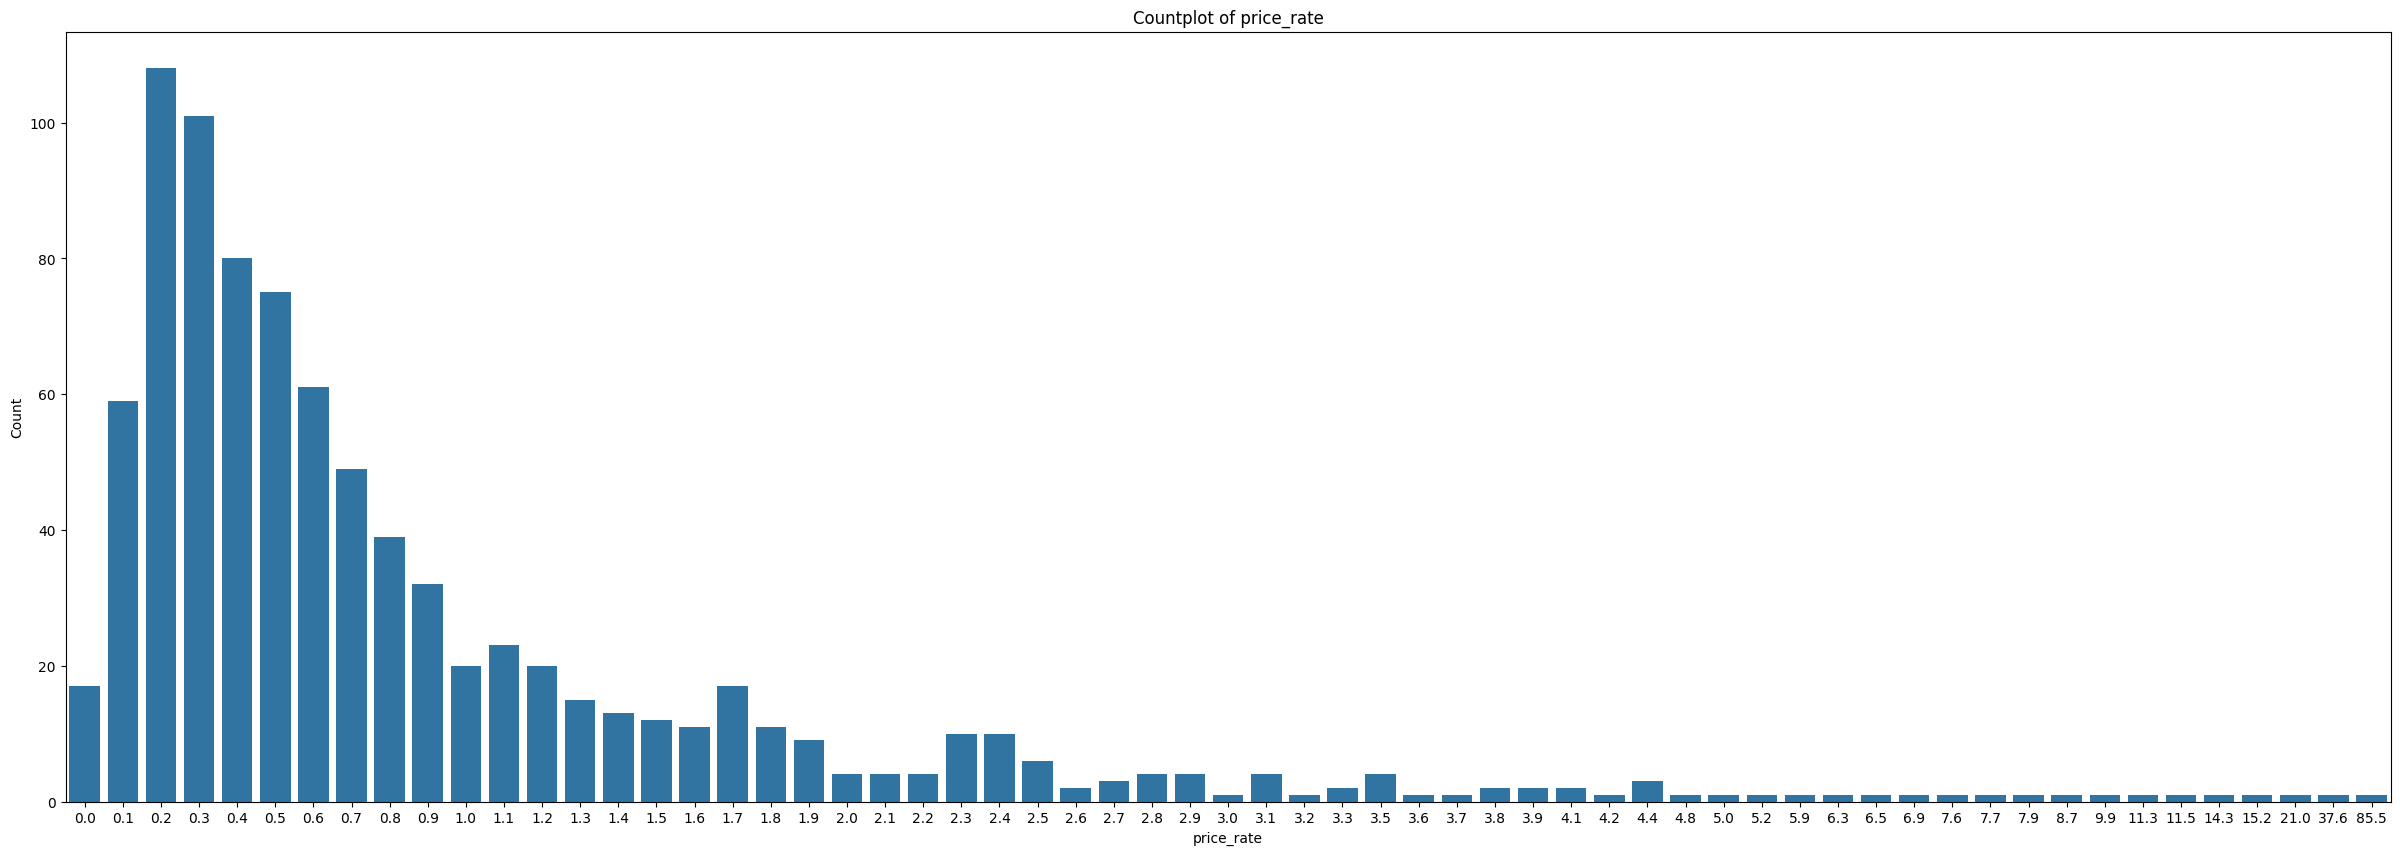

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# countplot을 그릴 열을 지정합니다.
column_name = 'price_rate'

# seaborn을 사용하여 countplot을 그립니다.
plt.figure(figsize=(30, 10))
sns.countplot(x=column_name, data=test)
plt.title(f'Countplot of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.show()

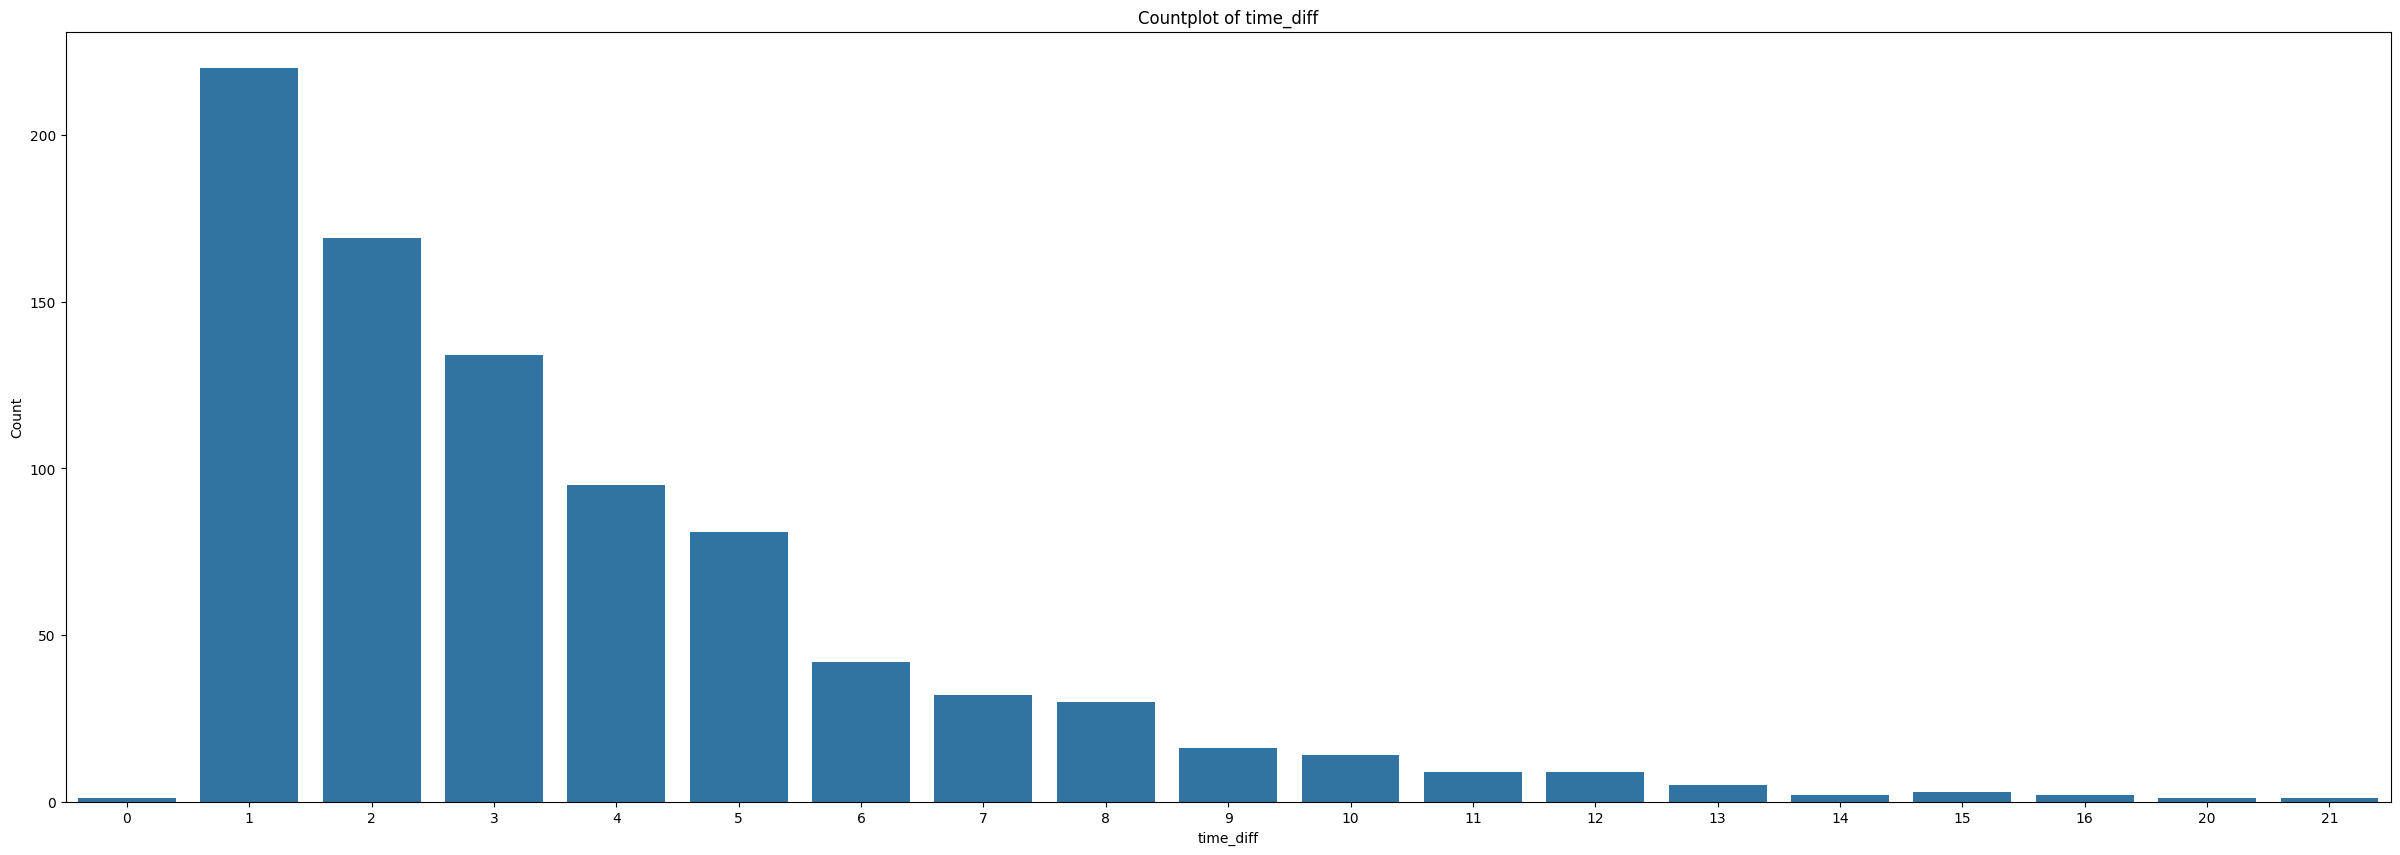

In [41]:
# countplot을 그릴 열을 지정합니다.
column_name = 'time_diff'

# seaborn을 사용하여 countplot을 그립니다.
plt.figure(figsize=(30, 10))
sns.countplot(x=column_name, data=test)
plt.title(f'Countplot of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.show()